#Problema 1

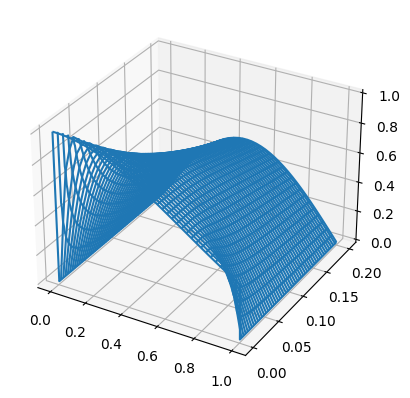

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as mth
from mpl_toolkits.mplot3d import Axes3D



M = 40 # number of grid points for space interval
N = 200 # ''     '' ''   ''     ''  time ''

x0 = 0
xL = 1 # unit grid differences

dx = (xL - x0) / (M - 1) # space step

t0 = 0
tF = 0.2

dt = (tF - t0) / (N - 1)

D = 0.3 # thermal diffusivity

a = D * dt / dx**2

# Create grid
tspan = np.linspace(t0, tF, N)
xspan = np.linspace(x0, xL, M)


# Initial matrix solution
U = np.zeros((M, N))

# Initial condition
U[:, 0] = np.exp(-xspan**2) #Gaussiana
# Boundary conditions
#U[0, :] = np.sin(10*np.pi*tspan)#Estas son las condiciones de contorno.
# Puse un par de funciones que se me ocurrieron, pueden variarlas
#U[-1, :] = np.sin(10*np.pi*tspan)#Esta también son algo que se me ocurre, pueden variarlas.

# El algoritmo de diferencias finitas
for k in range(0, N-1):
    for i in range(1, M-1):
        U[i, k+1] = a * U[i-1, k] + (1 - 2 * a) * U[i, k] + a * U[i + 1, k]


Tspan, Xspan = np.meshgrid(tspan, xspan)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)

plt.show()

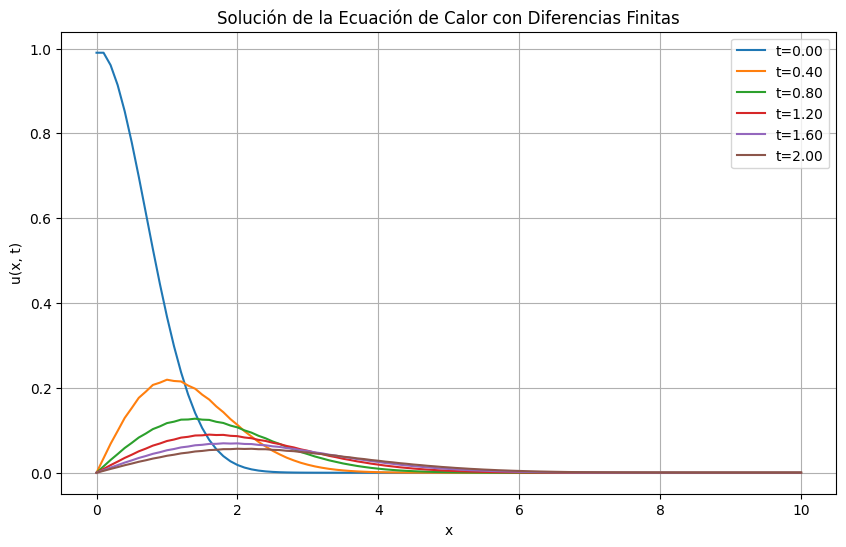

Integral numérica de u(x, t) en [0, L]: 0.1932
Integral teórica de u0(x) en [0, L]: 0.8862


In [ ]:
L = 10
alpha = 1
dx = 0.1
dt = 0.005
T = 2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)

nx = len(x)
nt = len(t)


u = np.zeros((nt, nx))

u0 = np.sin(np.pi * x / L)
u0 = np.exp(-x**2)

u[0, :] = u0

# Condición de frontera en x=0 (Neumann)
u[:, 0] = u[:, 1]


r = alpha * dt / dx**2

if r > 0.5:
    raise ValueError("El esquema no es estable, reduce dt o incrementa dx")

# Esquema de diferencias finitas
for n in range(0, nt-1):
    for i in range(1, nx-1):
        u[n+1, i] = u[n, i] + r * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

    # Condición de frontera en x=L (se puede ajustar según el problema)
    u[n+1, -1] = u[n+1, -2]

# Graficar la solución en diferentes instantes de tiempo
plt.figure(figsize=(10, 6))
for i in range(0, nt, nt//5):
    plt.plot(x, u[i, :], label=f't={t[i]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('Solución de la Ecuación de Calor con Diferencias Finitas')
plt.grid(True)
plt.show()

# Calcular la integral numérica de u(x, t) en el intervalo [0, L] para el tiempo final
integral_numerica = np.trapz(u[-1, :], x)
print(f"Integral numérica de u(x, t) en [0, L]: {integral_numerica:.4f}")

# Calcular la integral teórica de u0(x) en [0, L]
integral_teorica = np.trapz(u0, x)
print(f"Integral teórica de u0(x) en [0, L]: {integral_teorica:.4f}")

#Problema 2

In [ ]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [ ]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Primero para a=1

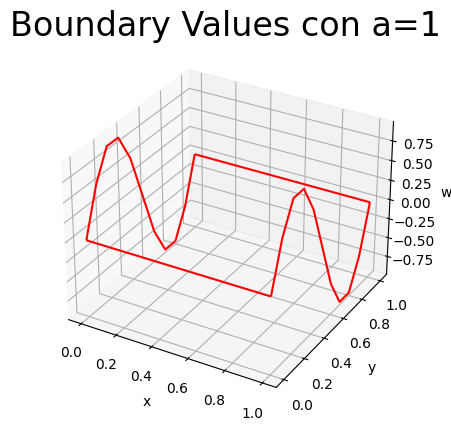

In [ ]:
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=np.sin(2*np.pi*x[i]) #left Boundary
        w[i,N]=np.sin(2*np.pi*x[i]) #Right Boundary

for j in range (0,N):
        w[0,j]=0#Lower Boundary
        w[N,j]=0#Upper Boundary


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values con a=1',fontsize=24,y=1.08)
plt.show()

In [ ]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal
for i in range (0,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL
for i in range (1,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j-1]=1
# UPPPER DIAGONAL
for i in range (0,N-2):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j+1]=1

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1


# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)

In [ ]:
r=np.zeros(N2)

# vector r
for i in range (0,N-1):
    for j in range (0,N-1):
        r[i+(N-1)*j]=100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])
# Boundary
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary

b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary

b=b_left_right+b_bottom_top

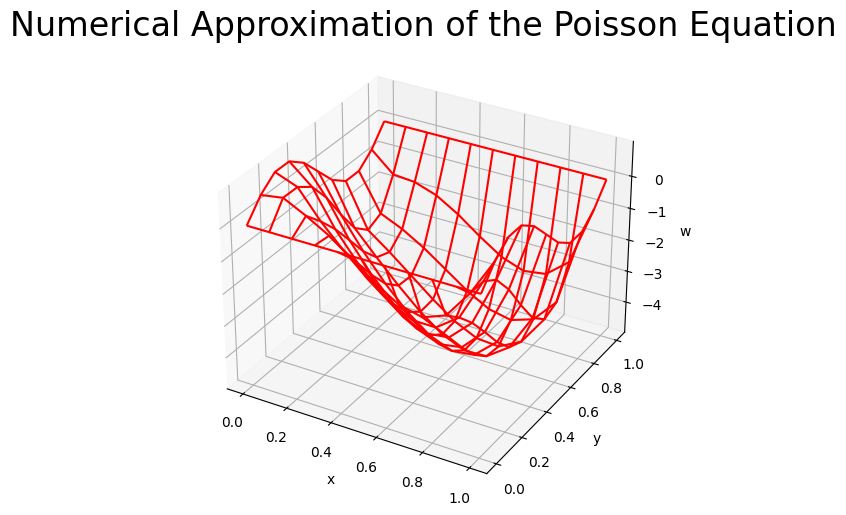

In [ ]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();

Ahora lo hago para a=0

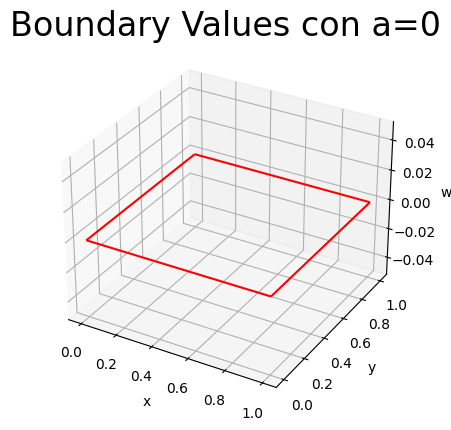

In [ ]:
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=0 #left Boundary
        w[i,N]=0 #Right Boundary

for j in range (0,N):
        w[0,j]=0#Lower Boundary
        w[N,j]=0#Upper Boundary


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values con a=0',fontsize=24,y=1.08)
plt.show()

In [ ]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal
for i in range (0,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL
for i in range (1,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j-1]=1
# UPPPER DIAGONAL
for i in range (0,N-2):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j+1]=1

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1


# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)

In [ ]:
r=np.zeros(N2)

# vector r
for i in range (0,N-1):
    for j in range (0,N-1):
        r[i+(N-1)*j]=100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])
# Boundary
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary

b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary

b=b_left_right+b_bottom_top

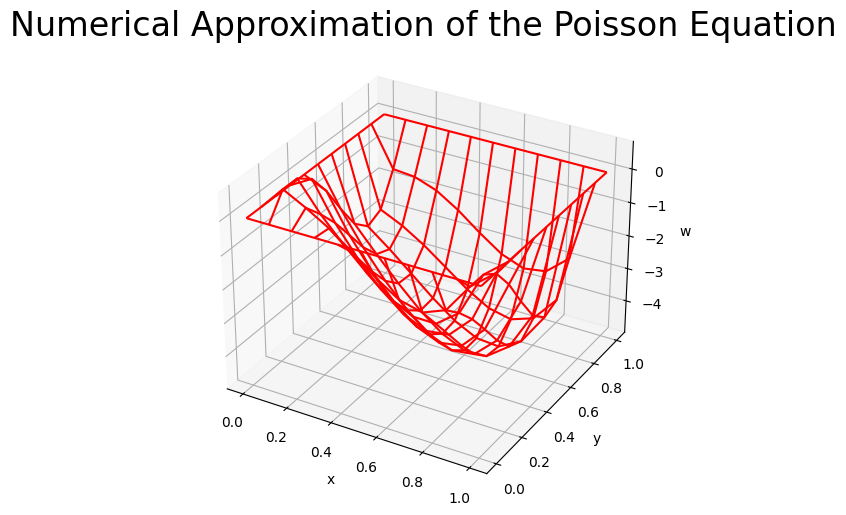

In [ ]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();

Vemos que en el borde es distinto pero en ambos casos la membrana se hunde

#Problema 3

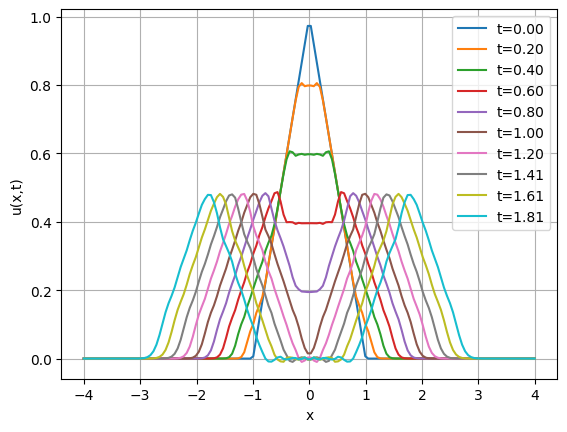

In [ ]:
L = 4
c = 1
T = 2
Nx = 150
Nt = 250
dx = 2 * L / Nx
dt = T / Nt

x = np.linspace(-L, L, Nx)
t = np.linspace(0, T, Nt)


u = np.zeros((Nt, Nx))
for i in range(Nx):
    if -1 <= x[i] <= 0:
        u[0, i] = 1 + x[i]
    elif 0 < x[i] <= 1:
        u[0, i] = 1 - x[i]


u[1, 1:-1] = u[0, 1:-1] + 0.5 * c**2 * (dt / dx)**2 * (u[0, 2:] - 2 * u[0, 1:-1] + u[0, :-2])


for k in range(1, Nt-1):
    u[k+1, 1:-1] = 2 * u[k, 1:-1] - u[k-1, 1:-1] + c**2 * (dt / dx)**2 * (u[k, 2:] - 2 * u[k, 1:-1] + u[k, :-2])


for k in range(0, Nt, Nt//10):
    plt.plot(x, u[k], label=f't={t[k]:.2f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

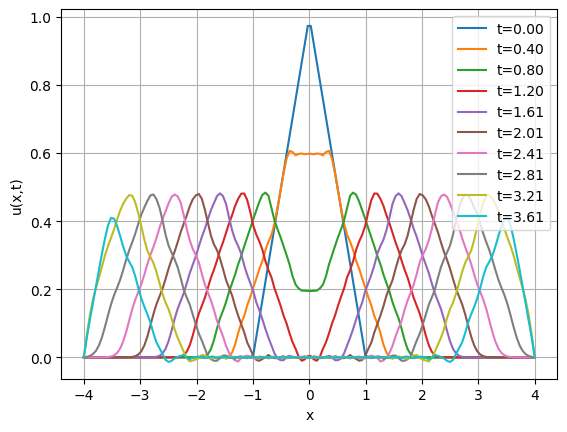

In [ ]:
L = 4
c = 1
T = 4
Nx = 150
Nt = 250
dx = 2 * L / Nx
dt = T / Nt

x = np.linspace(-L, L, Nx)
t = np.linspace(0, T, Nt)


u = np.zeros((Nt, Nx))
for i in range(Nx):
    if -1 <= x[i] <= 0:
        u[0, i] = 1 + x[i]
    elif 0 < x[i] <= 1:
        u[0, i] = 1 - x[i]


u[1, 1:-1] = u[0, 1:-1] + 0.5 * c**2 * (dt / dx)**2 * (u[0, 2:] - 2 * u[0, 1:-1] + u[0, :-2])


for k in range(1, Nt-1):
    u[k+1, 1:-1] = 2 * u[k, 1:-1] - u[k-1, 1:-1] + c**2 * (dt / dx)**2 * (u[k, 2:] - 2 * u[k, 1:-1] + u[k, :-2])


for k in range(0, Nt, Nt//10):
    plt.plot(x, u[k], label=f't={t[k]:.2f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

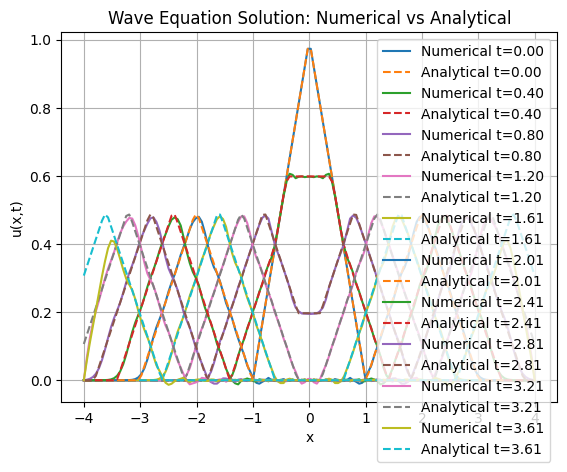

In [ ]:
for k in range(0, Nt, Nt//10):
    plt.plot(x, u[k], label=f'Numerical t={t[k]:.2f}')
    analytical = 0.5 * (np.interp(x + c * t[k], x, u[0]) + np.interp(x - c * t[k], x, u[0]))
    plt.plot(x, analytical, '--', label=f'Analytical t={t[k]:.2f}')
plt.title('Wave Equation Solution: Numerical vs Analytical')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()